In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential,Model
from tensorflow.keras.layers import Dense,Flatten,Conv2D,MaxPooling2D
from tensorflow.keras.layers import AveragePooling2D
from tensorflow.keras.layers  import Concatenate
from tensorflow.keras.layers import AveragePooling2D, Dropout, Input, BatchNormalization
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import classification_report, confusion_matrix
from PIL import Image
from tqdm import tqdm
import urllib
from tensorflow.keras.preprocessing import image
from sklearn.metrics import precision_recall_curve,roc_curve, auc
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt
import os
from sklearn.metrics import log_loss, brier_score_loss
from sklearn.metrics import cohen_kappa_score
import matplotlib.cm as cm
from sklearn.metrics import matthews_corrcoef
import pandas as pd
import seaborn as sns
import numpy as np
import cv2
from sklearn.preprocessing import label_binarize
from sklearn.metrics import average_precision_score
from tensorflow.keras.utils import to_categorical
%matplotlib inline

In [ ]:
import zipfile
from google.colab import drive

drive.mount('/content/drive/')

zip_ref = zipfile.ZipFile("/content/drive/My Drive/archive.zip", 'r')
zip_ref.extractall("/tmp")
zip_ref.close()

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
image_path="../tmp/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train/"

In [ ]:
train_image_path="../tmp/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train/"
valid_image_path="../tmp/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/valid/"
test_image_path="../tmp/test/"

In [ ]:
class_names = os.listdir(image_path)
print(class_names)

['Apple___Apple_scab', 'Peach___Bacterial_spot', 'Blueberry___healthy', 'Apple___Black_rot', 'Grape___Esca_(Black_Measles)', 'Tomato___Tomato_mosaic_virus', 'Pepper,_bell___Bacterial_spot', 'Apple___Cedar_apple_rust', 'Apple___healthy', 'Potato___Late_blight', 'Corn_(maize)___healthy', 'Squash___Powdery_mildew', 'Peach___healthy', 'Strawberry___Leaf_scorch', 'Tomato___Leaf_Mold', 'Corn_(maize)___Northern_Leaf_Blight', 'Raspberry___healthy', 'Tomato___Target_Spot', 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot', 'Corn_(maize)___Common_rust_', 'Tomato___healthy', 'Potato___Early_blight', 'Tomato___Spider_mites Two-spotted_spider_mite', 'Tomato___Bacterial_spot', 'Grape___healthy', 'Potato___healthy', 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)', 'Tomato___Early_blight', 'Orange___Haunglongbing_(Citrus_greening)', 'Cherry_(including_sour)___Powdery_mildew', 'Grape___Black_rot', 'Soybean___healthy', 'Cherry_(including_sour)___healthy', 'Pepper,_bell___healthy', 'Tomato___Late_blight'

In [ ]:
import pandas as pd
numberof_images={}
for class_name in class_names:
    numberof_images[class_name]=len(os.listdir(image_path+"/"+class_name))
images_each_class=pd.DataFrame(numberof_images.values(),index=numberof_images.keys(),columns=["Number of images"])
images_each_class

,Number of images
Apple___Apple_scab,2016
Peach___Bacterial_spot,1838
Blueberry___healthy,1816
Apple___Black_rot,1987
Grape___Esca_(Black_Measles),1920
Tomato___Tomato_mosaic_virus,1790
"Pepper,_bell___Bacterial_spot",1913
Apple___Cedar_apple_rust,1760
Apple___healthy,2008
Potato___Late_blight,1939


In [ ]:
batch_size=32

In [ ]:
import tensorflow as tf

# Now you can use TensorFlow functions and classes using 'tf'
traindata_generator=tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255,zoom_range=0.2,width_shift_range=0.2,height_shift_range=0.2,
                                                                    shear_range=0.2, horizontal_flip=True,validation_split=0.2)

validdata_generator=tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)
testdata_generator=tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)

In [ ]:
train_data_generator=traindata_generator.flow_from_directory(train_image_path,batch_size=batch_size,class_mode="categorical",
                                                           target_size=(120,120),color_mode="rgb",shuffle=True )

Found 70295 images belonging to 38 classes.


In [ ]:
valid_data_generator=validdata_generator.flow_from_directory(train_image_path,batch_size=batch_size,class_mode="categorical",
                                                           target_size=(120,120),color_mode="rgb",shuffle=True )

Found 70295 images belonging to 38 classes.


In [ ]:
test_data_generator=testdata_generator.flow_from_directory(valid_image_path,batch_size=batch_size,class_mode="categorical",target_size=(120,120),color_mode="rgb",shuffle=False )

Found 17572 images belonging to 38 classes.


In [ ]:
train_number=train_data_generator.samples
valid_number=valid_data_generator.samples

In [ ]:
def inceptionnet(x,filters):

    #(1x1) layer
    layer1=Conv2D(filters=filters[0],kernel_size=(1,1),strides=1,padding="same",activation="relu")(x)

    #(3x3) layer
    layer2=Conv2D(filters=filters[1][0],kernel_size=(1,1),strides=1,padding="same",activation="relu")(x)


    layer2=Conv2D(filters=filters[1][1],kernel_size=(1,1),strides=1,padding="same",activation="relu")(layer2)

    #(5x5) layer

    layer3=Conv2D(filters=filters[2][0],kernel_size=(5,5),strides=1,padding="same",activation="relu")(x)

    layers=Conv2D(filters=filters[2][1],kernel_size=(5,5),strides=1,padding="same",activation="relu")(layer3)



    layer4=MaxPooling2D(pool_size=(3,3),strides=1,padding="same")(x)
    layer4=Conv2D(filters=filters[3],kernel_size=(1,1),strides=1,padding="same",activation="relu")(layer4)


    return Concatenate(axis=-1)([layer1,layer2,layer3,layer4])


def helperfunction(x,name=None):

    layer=AveragePooling2D(pool_size=(5,5),strides=3,padding="valid")(x)

    layer=Conv2D(filters=128,kernel_size=(1,1),strides=1,padding="same",activation="relu")(layer)

    layer=Flatten()(layer)

    layer=Dense(units=255,activation="relu")(layer)

    layer=Dropout(0.4)(layer)
    layer=Dense(units=38,activation="softmax",name=name)(layer)

    return layer


def googlenet():

    #taking layer input
    inputlayer=Input(shape=(120,120,3))

    #layer_1
    layer=Conv2D(filters=64,kernel_size=(7,7),strides=1,padding="same",activation="relu")(inputlayer)

    layer=MaxPooling2D(pool_size=(3,3),strides=2,padding="same")(layer)

    layer=BatchNormalization()(layer)

    #layer_2
    layer=Conv2D(filters=64,kernel_size=(1,1),strides=1,padding="same",activation="relu")(layer)

    layer=Conv2D(filters=192,kernel_size=(3,3),strides=1,padding="same",activation="relu")(layer)

    layer=BatchNormalization()(layer)
    layer=MaxPooling2D(pool_size=(3,3),strides=2,padding="same")(layer)

    #layer_3
    layer=inceptionnet(layer,[64,(96,128),(16,32),32])
    layer=inceptionnet(layer,[128,(128,192),(32,96),64])
    layer=MaxPooling2D(pool_size=(3,3),strides=2,padding="same")(layer)

    #layer_4
    layer=inceptionnet(layer,[192,(96,208),(16,48),64])
    final_0=helperfunction(layer,name="final_layer_0")

    layer=inceptionnet(layer,[160,(112,224),(24,64),64])
    layer=inceptionnet(layer,[128,(128,256),(24,64),64])
    layer=inceptionnet(layer,[112,(144,288),(32,64),64])
    final_1=helperfunction(layer,name="final_layer_1")

    layer=inceptionnet(layer,[256,(160,320),(32,128),128])
    layer=MaxPooling2D(pool_size=(3,3),strides=2,padding="same")(layer)


    #layer_5
    layer=inceptionnet(layer,[256,(160,320),(32,128),128])
    layer=inceptionnet(layer,[384,(192,384),(48,128),128])
    layer=AveragePooling2D(pool_size=(7,7),strides=1,padding="same")(layer)

    #layer_6

    layer=Flatten()(layer)
    layer=Dropout(0.4)(layer)
    layer=Dense(units=256,activation="linear")(layer)
    final_2=Dense(units=38,activation="softmax",name="final_layer_2")(layer)


    model=Model(inputs=inputlayer,outputs=[final_2,final_0,final_1])

    return model

In [ ]:
from tensorflow.keras.layers import Concatenate
import tensorflow as tf
from tensorflow.keras.layers import (
    Input, Conv2D, MaxPooling2D, BatchNormalization, concatenate,  # Import Concatenate
    AveragePooling2D, Flatten, Dense, Dropout
)
from tensorflow.keras.models import Model

# ... (rest of your code)

model = googlenet()
model.summary()


Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 120, 120, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 120, 120, 64  9472        ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 max_pooling2d (MaxPooling2D)   (None, 60, 60, 64)   0           ['conv2d[0][0]']                 
                                                                                              

In [ ]:
from tensorflow.keras.optimizers import Adam

learning_rate = 0.001

opti = Adam(learning_rate=learning_rate)

model.compile(loss=['categorical_crossentropy', 'categorical_crossentropy', 'categorical_crossentropy'], loss_weights=[1, 0.3, 0.3], optimizer=opti, metrics=['accuracy'])


In [ ]:
model.save("model.h5")
from tensorflow.keras.models import load_model

model = load_model("model.h5")

In [ ]:
pred, _, _=model.predict(test_data_generator)
final_predict = np.argmax(pred,axis=1)
true_data=test_data_generator.classes

550/550 [==============================] - 1803s 3s/step


In [ ]:
acc_score = accuracy_score(true_data,final_predict)
print(f'Accuracy Score: {acc_score:.4f}')

Accuracy Score: 0.0446


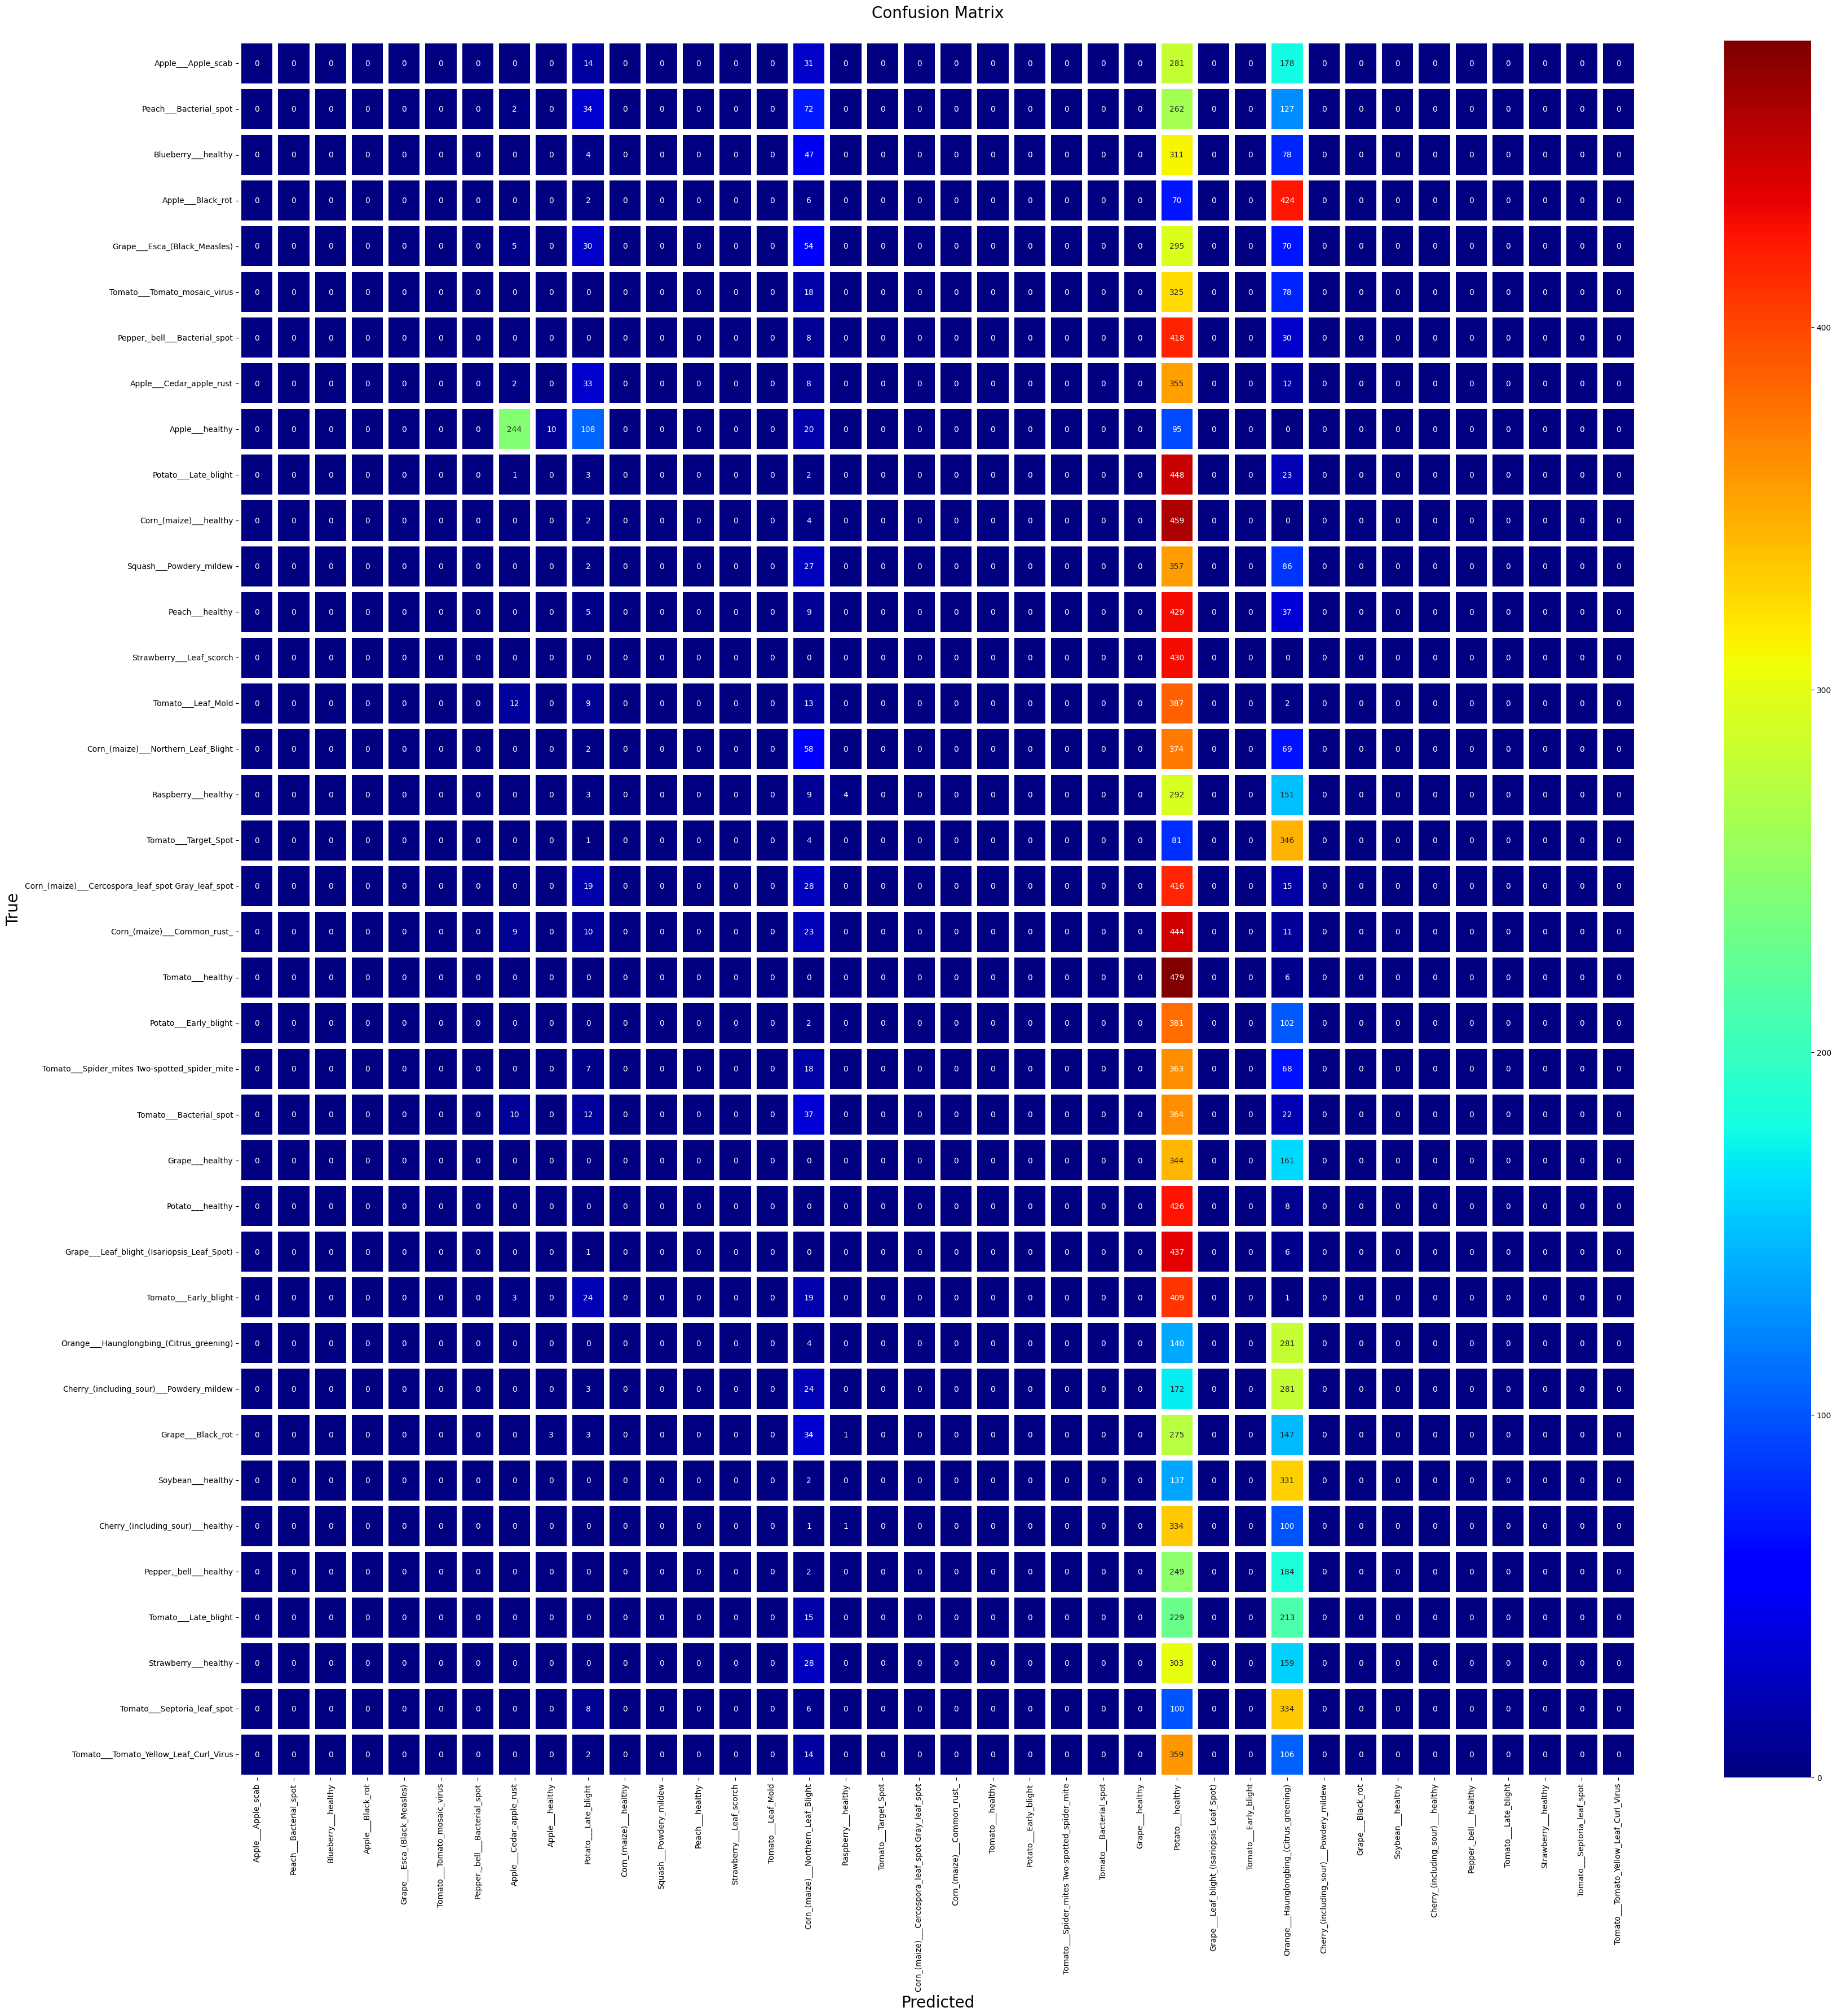

In [ ]:
plt.figure(figsize=(40,40))
confusion = confusion_matrix(true_data, final_predict)
sns.heatmap(confusion, annot=True, fmt='d', cmap='jet',xticklabels=class_names,
            yticklabels=class_names,lw=6)
plt.xlabel('Predicted',fontsize=20,color="black")
plt.ylabel('True',fontsize=20,color="black")
plt.title('Confusion Matrix\n',fontsize=20,color="black")
plt.show()

In [ ]:
print(classification_report(true_data, final_predict,target_names=class_names))

                                                    precision    recall  f1-score   support

                                Apple___Apple_scab       0.00      0.00      0.00       504
                            Peach___Bacterial_spot       0.00      0.00      0.00       497
                               Blueberry___healthy       0.00      0.00      0.00       440
                                 Apple___Black_rot       0.00      0.00      0.00       502
                      Grape___Esca_(Black_Measles)       0.00      0.00      0.00       454
                      Tomato___Tomato_mosaic_virus       0.00      0.00      0.00       421
                     Pepper,_bell___Bacterial_spot       0.00      0.00      0.00       456
                          Apple___Cedar_apple_rust       0.01      0.00      0.01       410
                                   Apple___healthy       0.77      0.02      0.04       477
                              Potato___Late_blight       0.01      0.01      0.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


1/1 [==============================] - 2s 2s/step
Predicted class: Potato___healthy
Maximum probability: 0.48566409945487976


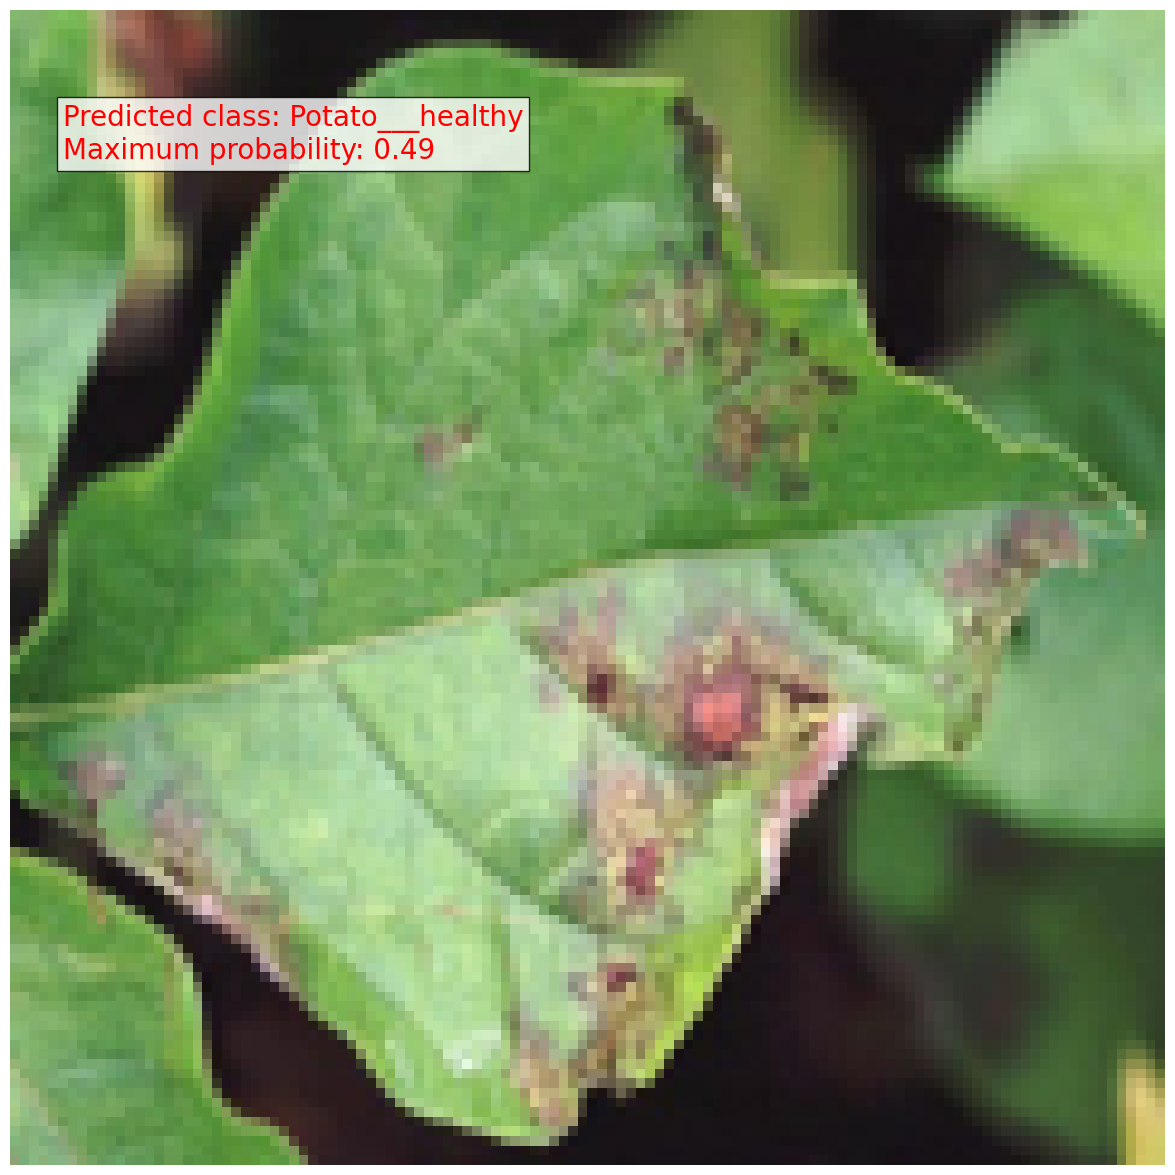

In [ ]:
plt.figure(figsize=(15, 15))

img_url = "https://cdn.britannica.com/89/126689-004-D622CD2F/Potato-leaf-blight.jpg"

filename, headers = urllib.request.urlretrieve(img_url)
img_path = os.path.join(os.getcwd(), filename)
img = Image.open(img_path)
img = img.resize((120, 120))
img = np.array(img) / 255.0
img = np.expand_dims(img, axis=0)
probs = model.predict(img)[0]

# Get the predicted class index and name
pred_class_prob = np.argmax(probs)
pred_class_name = class_names[pred_class_prob]

max_prob = np.max(probs)
print(f'Predicted class: {pred_class_name}')
print(f'Maximum probability: {max_prob}')

# Display the image with the predicted class and probability
plt.imshow(img[0])
plt.axis('off')
plt.text(5, 15, f'Predicted class: {pred_class_name}\nMaximum probability: {max_prob:.2f}', fontsize=20, color='red', bbox=dict(facecolor='white', alpha=0.8))
plt.show()